In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import numpy as np

def init_thesis_plot_style():
    my_rc_params = {
        "xtick.direction": "in",
        "xtick.major.size": 8.0,
        "xtick.minor.size": 4.0,
        "xtick.minor.visible": True,
        "xtick.major.width": 1.2,
        "xtick.minor.width": 0.9,
        "ytick.direction": "in",
        "ytick.major.size": 8.0,
        "ytick.minor.size": 4.0,
        "ytick.minor.visible": True,
        "ytick.major.width": 1.2,
        "ytick.minor.width": 0.9,
        "errorbar.capsize": 2,
        "axes.linewidth": 1.2,
        # "font.familiy": "serif",
        "font.size": 14,
        "axes.grid": False,
        "ytick.right": True,
        "xtick.top": True
    }
    return(my_rc_params)


init_thesis_plot_style()
plt.rcParams.update(init_thesis_plot_style())

In [37]:
bins = np.array([0,1,2,4,6,8,11,16])
bin_centers = (bins[:-1] + bins[1:]) / 2

# Results for track by track PV association

dotted
-.
dashed
dashdot
solid


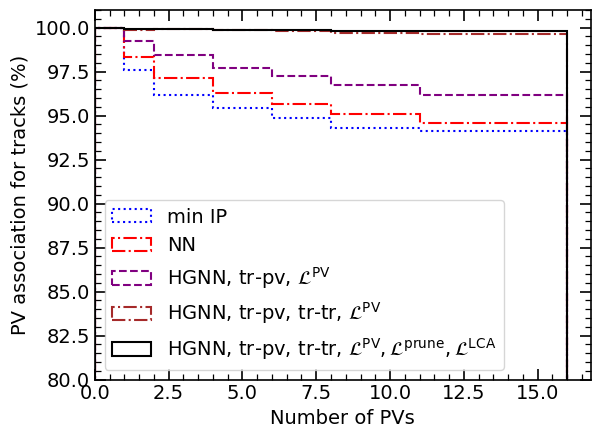

In [49]:
datasets = ["PV_association_MINIP.csv", "PV_association_NN.csv", "PV_association_HGNN_no_track_edges.csv",   "PV_association_HGNN_no_LCA.csv",  "PV_association_HGNN_all_tasks.csv"]
labels = [ "min IP", "NN", r"HGNN, tr-pv, $\mathcal{L}^{\rm PV}$", r"HGNN, tr-pv, tr-tr, $\mathcal{L}^{\rm PV}$", r"HGNN, tr-pv, tr-tr, $\mathcal{L}^{\rm PV}, \mathcal{L}^{\rm prune}, \mathcal{L}^{\rm LCA}$"]
line_styles = [   "dotted", "-.", "dashed","dashdot", "solid"]
colors = [   "blue", "red", "purple","brown", "black"]
label_dic = dict(zip(datasets,labels))
linestyle_dic = dict(zip(datasets,line_styles))
color_dic = dict(zip(datasets,colors))
means=[]
stds =[]
for dataset in datasets:
    df = pandas.read_csv(dataset)
    #df = df.query("btrack == 1 ")
    means.append(np.mean(df.associated))
    stds.append(np.std(df.associated))
    eff = []
    std = []
    for i in range(0,len(bins)-1):
        #dfcut = df.query(f"{bins[i]} < npvs <= {bins[i+1]} and btrack == 1 ")
        dfcut = df.query(f"{bins[i]} < npvs <= {bins[i+1]}")
        eff.append(np.mean(dfcut.associated))
        std.append(np.std(dfcut.associated))
    print( linestyle_dic[dataset])
    plt.hist(
            bin_centers,
            weights=np.array(eff)*100,
            bins=bins,
            #edgecolor="black",
            histtype="step",
            color=color_dic[dataset],
            linestyle = linestyle_dic[dataset],
            label=label_dic[dataset],
            linewidth=1.5,
            stacked=True
        )

plt.xlabel("Number of PVs")
plt.ylabel("PV association for tracks (%)")

plt.ylim(bottom=80, top=101)
plt.xlim(left = 0)
plt.legend(loc="lower left")


plt.savefig("PV_association_tracks.png",dpi=300)
plt.savefig("PV_association_tracks.pdf")

In [50]:
eff

[1.0,
 0.9992699545749514,
 0.9993751207153163,
 0.9988744055849719,
 0.9987050132302783,
 0.9981929212362911,
 0.9981625918704065]

dotted
-.
dashed
dashdot
solid


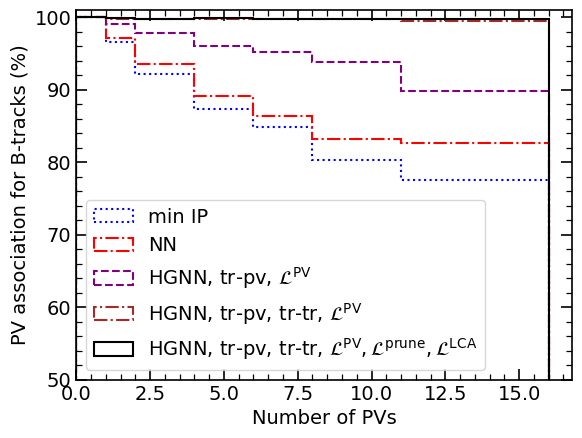

In [43]:
datasets = ["PV_association_MINIP.csv", "PV_association_NN.csv", "PV_association_HGNN_no_track_edges.csv",   "PV_association_HGNN_no_LCA.csv",  "PV_association_HGNN_all_tasks.csv"]
labels = [ "min IP", "NN", r"HGNN, tr-pv, $\mathcal{L}^{\rm PV}$", r"HGNN, tr-pv, tr-tr, $\mathcal{L}^{\rm PV}$", r"HGNN, tr-pv, tr-tr, $\mathcal{L}^{\rm PV}, \mathcal{L}^{\rm prune}, \mathcal{L}^{\rm LCA}$"]
line_styles = [   "dotted", "-.", "dashed","dashdot", "solid"]
colors = [   "blue", "red", "purple","brown", "black"]
label_dic = dict(zip(datasets,labels))
linestyle_dic = dict(zip(datasets,line_styles))
color_dic = dict(zip(datasets,colors))
#datasets = [ "PV_association_HGNN_all_tasks.csv"]
means2=[]
stds2 =[]
for dataset in datasets:
    df = pandas.read_csv(dataset)
    df = df.query("btrack == 1 ")
    means2.append(np.mean(df.associated))
    stds2.append(np.std(df.associated))
    eff = []
    std = []
    for i in range(0,len(bins)-1):
        #dfcut = df.query(f"{bins[i]} < npvs <= {bins[i+1]} and btrack == 1 ")
        dfcut = df.query(f"{bins[i]} < npvs <= {bins[i+1]}")
        eff.append(np.mean(dfcut.associated))
        std.append(np.std(dfcut.associated))
    print( linestyle_dic[dataset])
    plt.hist(
            bin_centers,
            weights=np.array(eff)*100,
            bins=bins,
            #edgecolor="black",
            linewidth=1.5,
            histtype="step",
            color=color_dic[dataset],
            linestyle = linestyle_dic[dataset],
            label=label_dic[dataset],
            stacked=True
        )

plt.xlabel("Number of PVs")
plt.ylabel("PV association for B-tracks (%)")

plt.ylim(bottom=50, top=101)
plt.xlim(left = 0)
plt.legend(loc="lower left")


plt.savefig("PV_association_b_tracks.png",dpi=300)
plt.savefig("PV_association_b_tracks.pdf")

In [5]:
import pandas as pd
import numpy as np

# Example data
categories = ['min IP', 'NN',
 'HGNN',
 'HGNN',
 'HGNN']

tasks =  ['-',
 '-',
 '$\mathcal{L}^{\mathrm PV}_{\mathrm BCE}$',
 '$\mathcal{L}^{\mathrm PV}_{\mathrm BCE}$',
 '$\mathcal{L}^{\mathrm PV}_{\mathrm BCE}, \mathcal{L}^{\mathrm prune}_{\mathrm BCE}, \mathcal{L}^{\mathrm LCA}_{\mathrm BCE}$']

edge_types = ["-", "-", "tr-pv", "tr-pv, tr-tr", "tr-pv, tr-tr"]
# Create DataFrame
df = pd.DataFrame({
    "method": categories,
    "task" : tasks,
    "edge type": edge_types,
    "Value": 100*np.array(means),
    "Uncertainty": 100*np.array(stds),
    "Value2": 100*np.array(means2),
    "Uncertainty2": 100**np.array(stds2)
})

# Format values as "mean ± std"
df["track-PV association"] = df.apply(lambda row: f"{row['Value']:.3f} ± {row['Uncertainty']:.3f}", axis=1)
df["B-track-PV association"] = df.apply(lambda row: f"{row['Value2']:.3f} ± {row['Uncertainty2']:.3f}", axis=1)
df["track-PV association"] = df.apply(lambda row: f"{row['Value']:.1f}", axis=1)
df["B-track-PV association"] = df.apply(lambda row: f"{row['Value2']:.1f} ", axis=1)
# Select columns for LaTeX table
latex_table = df[["method","task","edge type","track-PV association", "B-track-PV association"]].to_latex(index=False, escape=False)

# Print or save LaTeX table
print(latex_table)

\begin{tabular}{lllll}
\toprule
method & task & edge type & track-PV association & B-track-PV association \\
\midrule
min IP & - & - & 95.3 & 88.1  \\
NN & - & - & 96.1 & 89.7  \\
HGNN & $\mathcal{L}^{\mathrm PV}_{\mathrm BCE}$ & tr-pv & 97.6 & 96.3  \\
HGNN & $\mathcal{L}^{\mathrm PV}_{\mathrm BCE}$ & tr-pv, tr-tr & 99.8 & 99.8  \\
HGNN & $\mathcal{L}^{\mathrm PV}_{\mathrm BCE}, \mathcal{L}^{\mathrm prune}_{\mathrm BCE}, \mathcal{L}^{\mathrm LCA}_{\mathrm BCE}$ & tr-pv, tr-tr & 99.9 & 99.8  \\
\bottomrule
\end{tabular}



In [ ]:
!ls B_hadron_pv_association.csv

In [11]:
bins = np.array([0,1,2,4,6,8,11,16])
bin_centers = (bins[:-1] + bins[1:]) / 2

In [12]:
df = pd.read_csv(datasets[-1])

In [13]:
df

,Unnamed: 0,associated,npvs,btrack,event_number,n_tracks
0,0,1,6,0,0,161
1,1,1,6,0,0,161
2,2,1,6,0,0,161
3,3,1,6,0,0,161
4,4,1,6,0,0,161
...,...,...,...,...,...,...
1410818,1410818,1,8,0,9999,137
1410819,1410819,1,8,0,9999,137
1410820,1410820,1,8,0,9999,137
1410821,1410821,1,8,0,9999,137


B_hadron_pv_association.csv
B_hadron_pv_association.csv
B_hadron_pv_association_HGNN_no_track_edges.csv
B_hadron_pv_association_HGNN_track_edges.csv
B_hadron_pv_association.csv


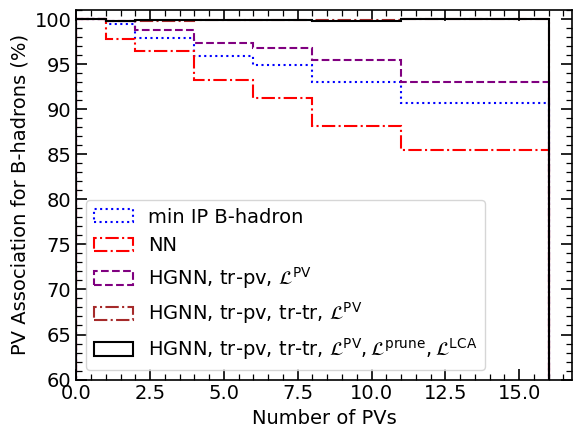

In [48]:
datasets = ["B_hadron_pv_association_HGNN_no_track_edges.csv", "B_hadron_pv_association_HGNN_track_edges.csv","B_hadron_pv_association.csv"]
labels = [ r"HGNN, tr-pv, $\mathcal{L}^{\rm PV}$", r"HGNN, tr-pv, tr-tr, $\mathcal{L}^{\rm PV}$", r"HGNN, tr-pv, tr-tr, $\mathcal{L}^{\rm PV}, \mathcal{L}^{\rm prune}, \mathcal{L}^{\rm LCA}$"]

line_styles = [ "dashed","dashdot", "solid"]
label_dic = dict(zip(datasets,labels))
linestyle_dic = dict(zip(datasets,line_styles))
colors = [   "purple","brown", "black"]

color_dic = dict(zip(datasets,colors))
#datasets = [ "PV_association_HGNN_all_tasks.csv"]
    #df = pandas.read_csv(dataset)

means3=[]
stds3 =[]
eff = []
std = []
df = pd.read_csv(datasets[1])
means3.append(np.mean(df.min_IP))
stds3.append(np.std(df.min_IP))
for i in range(0,len(bins)-1):
    dfcut = df.query(f"{bins[i]} < npvs <= {bins[i+1]} ")
    #dfcut = df.query(f"{bins[i]} < npvs <= {bins[i+1]}")
    dfcut = dfcut.groupby("event_number").mean()
    eff.append(np.mean(dfcut.min_IP))
    std.append(np.std(dfcut.min_IP))
print(dataset)
plt.hist(
        bin_centers,
        weights=np.array(eff)*100,
        bins=bins,
        #edgecolor="black",
        histtype="step",
        color="blue",        
        # color=colors,
            
        linewidth=1.5,
        linestyle ="dotted",
        label="min IP B-hadron",
        stacked=True
    )

eff = []
std = []
df = pd.read_csv(datasets[1])
means3.append(np.mean(df.nn))
stds3.append(np.std(df.nn))
for i in range(0,len(bins)-1):
    df = pd.read_csv(datasets[1])
    dfcut = df.query(f"{bins[i]} < npvs <= {bins[i+1]} ")
    #dfcut = df.query(f"{bins[i]} < npvs <= {bins[i+1]}")
    dfcut = dfcut.groupby("event_number").mean()
    eff.append(np.mean(dfcut.nn))
    std.append(np.std(dfcut.nn))
print(dataset)
plt.hist(
        bin_centers,
        weights=np.array(eff)*100,
        bins=bins,
        #edgecolor="black",
        histtype="step",
        linewidth=1.5,        
        color="red",
        linestyle ="-.",
        label="NN",
        stacked=True
    )
for dataset in datasets:
    #df = pandas.read_csv(dataset)
    eff = []
    std = []
    df = pd.read_csv(dataset)
    means3.append(np.mean(df.gnn))
    stds3.append(np.std(df.gnn))
    for i in range(0,len(bins)-1):
        dfcut = df.query(f"{bins[i]} < npvs <= {bins[i+1]} ")
        #dfcut = df.query(f"{bins[i]} < npvs <= {bins[i+1]}")
        dfcut = dfcut.groupby("event_number").mean()
        eff.append(np.mean(dfcut.gnn))
        std.append(np.std(dfcut.gnn))
    print(dataset)
    plt.hist(
            bin_centers,
            weights=np.array(eff)*100,
            bins=bins,
            #edgecolor="black",
            histtype="step",
            color=color_dic[dataset],            
            # color=colors,
            linewidth=1.5,
            linestyle = linestyle_dic[dataset],
            label=label_dic[dataset],
            stacked=True
        )
    # plt.errorbar(x= bin_centers, y=np.array(eff)*100, yerr=np.array(std)*100,
    #              marker=".") #, color="black", label="Data")
        
        # Labels and formatting
plt.xlabel("Number of PVs")
plt.ylabel("PV Association for B-hadrons (%)")

plt.ylim(bottom=60, top=101)
plt.xlim(left = 0)
plt.legend(loc="lower left")

plt.savefig("PV_association_b_hadron.png",dpi=300)
plt.savefig("PV_association_b_hadron.pdf")

In [45]:
import pandas as pd
import numpy as np

# Example data
categories = ['min IP', 'NN',
 'HGNN',
 'HGNN',
 'HGNN']

tasks =  ['-',
 '-',
 '$\mathcal{L}^{\mathrm PV}_{\mathrm BCE}$',
 '$\mathcal{L}^{\mathrm PV}_{\mathrm BCE}$',
 '$\mathcal{L}^{\mathrm PV}_{\mathrm BCE}, \mathcal{L}^{\mathrm prune}_{\mathrm BCE}, \mathcal{L}^{\mathrm LCA}_{\mathrm BCE}$']

edge_types = ["-", "-", "tr-pv", "tr-pv, tr-tr", "tr-pv, tr-tr"]
# Create DataFrame
df = pd.DataFrame({
    "method": categories,
    "task" : tasks,
    "edge type": edge_types,
    "Value": 100*np.array(means),
    "Uncertainty": 100*np.array(stds),
    "Value2": 100*np.array(means2),
    "Uncertainty2": 100**np.array(stds2),
    "Value3": 100*np.array(means3),
    "Uncertainty3": 100**np.array(stds3)
})

# Format values as "mean ± std"
df["track-PV association"] = df.apply(lambda row: f"{row['Value']:.3f} ± {row['Uncertainty']:.3f}", axis=1)
df["B-track-PV association"] = df.apply(lambda row: f"{row['Value2']:.3f} ± {row['Uncertainty2']:.3f}", axis=1)
df["track-PV association"] = df.apply(lambda row: f"{row['Value']:.1f}", axis=1)
df["B-track-PV association"] = df.apply(lambda row: f"{row['Value2']:.1f} ", axis=1)
df["B-hadron-PV association"] = df.apply(lambda row: f"{row['Value3']:.1f} ", axis=1)
# Select columns for LaTeX table
latex_table = df[["method","task","edge type","track-PV association", "B-track-PV association", "B-hadron-PV association"]].to_latex(index=False, escape=False)

# Print or save LaTeX table
print(latex_table)

\begin{tabular}{llllll}
\toprule
method & task & edge type & track-PV association & B-track-PV association & B-hadron-PV association \\
\midrule
min IP & - & - & 95.3 & 88.1  & 96.0  \\
NN & - & - & 96.1 & 89.7  & 93.2  \\
HGNN & $\mathcal{L}^{\mathrm PV}_{\mathrm BCE}$ & tr-pv & 97.6 & 96.3  & 97.8  \\
HGNN & $\mathcal{L}^{\mathrm PV}_{\mathrm BCE}$ & tr-pv, tr-tr & 99.8 & 99.8  & 99.9  \\
HGNN & $\mathcal{L}^{\mathrm PV}_{\mathrm BCE}, \mathcal{L}^{\mathrm prune}_{\mathrm BCE}, \mathcal{L}^{\mathrm LCA}_{\mathrm BCE}$ & tr-pv, tr-tr & 99.9 & 99.8  & 99.9  \\
\bottomrule
\end{tabular}

